In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima
import math

In [4]:
events_dict = {
    'BLUE: first_blood': 0,
    'BLUE: dragon': 1,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 18,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 37
}

df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('game', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)
        else:
            del game[i]

for game in data:
    game = [item for item in game if not(math.isnan(item)) == True]

data = [[x for x in y if not np.isnan(x)] for y in data]

dataArray = []

for game in data:
    dataArray += game

df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('game', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)
        else:
            del game[i]

for game in data:
    game = [item for item in game if not(math.isnan(item)) == True]

data = [[x for x in y if not np.isnan(x)] for y in data]
dataArray = []

for game in data:
    dataArray += game

dataframe = pd.DataFrame(dataArray)
dataset = dataframe.values
dataset = dataset.astype('float32')

# vislumbrar um pedaço dos dados e formato lido
print("\n* Dimensão dos dados:", dataset.shape) 
# 36 amostras/instâncias, univariadas (um único valor real)
print("* Dados originais:")
print(dataset[:10])


* Dimensão dos dados: (6996, 1)
* Dados originais:
[[19.]
 [ 2.]
 [ 3.]
 [20.]
 [21.]
 [ 4.]
 [ 5.]
 [20.]
 [23.]
 [34.]]


In [5]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(dataset)

(0.01, False)

In [6]:
train = dataset[:85]
test = dataset[-20:]

In [7]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=15, max_d=15, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=15,
                          max_Q=15, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=585.505, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=566.476, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=573.774, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=556.698, Time=0.26 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=558.693, Time=0.61 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=558.628, Time=0.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=558.991, Time=0.39 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=2.96 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=567.263, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=544.890, Time=0.37 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=550.886, Time=0.13 sec
 ARIMA(2,1,0)(3,1,0)[12]             : AIC=546.737, Time=0.71 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=546.151, Time=0.89 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   85
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -267.276
Date:                              Mon, 27 Jun 2022   AIC                            542.552
Time:                                      21:31:42   BIC                            551.659
Sample:                                           0   HQIC                           546.178
                                               - 85                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5642      0.110     -5.137      0.000      -0.779      -0.349
ar.L2         -0.4560      0.098     -4.645      0.000      -0.648      -0.264
ma.S.L12      -0.8400      0.312     -2.691      0.007      -1.452      -0.228
sigma2        80.5952     21.314      3.781      0.000      38.821     122.370
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.80   Prob(JB):                         0.91
Heteroskedasticity (H):               0.93   Skew:                             0.07
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20))
prediction.columns = ['predicted_events']
prediction

,predicted_events
0,5.277182
1,10.676485
2,14.739578
3,10.398652
4,9.038529
5,9.491829
6,16.105265
7,21.023324
8,17.722059
9,13.490415


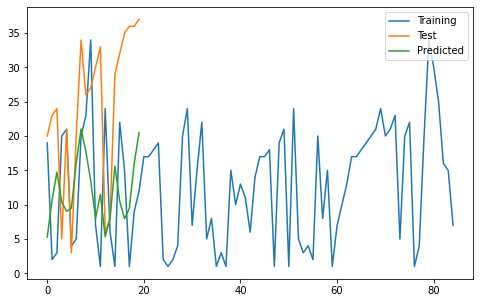

In [9]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper right')
plt.show()

In [10]:
from sklearn.metrics import r2_score
r2_score(test, prediction)

-1.0689487986932682

In [11]:
test

array([[20.],
       [23.],
       [24.],
       [ 5.],
       [21.],
       [ 3.],
       [20.],
       [34.],
       [26.],
       [27.],
       [30.],
       [33.],
       [ 6.],
       [ 8.],
       [29.],
       [32.],
       [35.],
       [36.],
       [36.],
       [37.]], dtype=float32)